In [1]:
import csv
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from pylab import scatter, show, legend, xlabel, ylabel

In [28]:
INPUT_LAYER = 2    #NO. of nodes in input layer
HIDDEN_LAYER = 3   #NO. of nodes in hidden layer
OUTPUT_LAYER = 1   #NO. of nodes in otput layer
learning_rate = .3 #Learning rate
lamda = 0.0        #Regularisation not taken in consideration
epochs = 30000    #Number of iterations

In [3]:
def displayData(X,Y):             #Displays data
    for i in range(len(X)):
        if(Y[i]==1):           # 1 is marked by o
            plt.scatter(X[i][0], X[i][1],marker = 'o',color = 'b',s = 30)
        else:                  # 0 is marked by x
            plt.scatter(X[i][0],X[i][1],marker = 'x' , color = 'r',s = 30)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(['1','0'])
    plt.show()
    return

In [4]:
def Randomise():
    #Here the value of each element of Theta_1,Theta_2 lies between [-Epsilon_init,+Epsilon_init]
    EPSILON_INIT = 0.12
    Theta_1 = np.random.rand(HIDDEN_LAYER,INPUT_LAYER+1)*(2*EPSILON_INIT)-(EPSILON_INIT)     # Random Weights for level 1
    Theta_2 = np.random.rand(OUTPUT_LAYER,HIDDEN_LAYER+1)*(2*EPSILON_INIT)-(EPSILON_INIT)    # Random Weights for level 2
    return Theta_1,Theta_2

In [5]:
def sigmoid(z):
    t = 1.0/(1.0 + np.exp(-1.0 * z))       #Sigmoid function
    return t

In [6]:
def sigmoidGradient(z):
    p = sigmoid(z)
    q = 1 - p
    return np.multiply(p,q)                #returns the derivative of sigmoid value for any z

In [7]:
def ForwardProp(a1,Theta_1,Theta_2):
    a1 = [[1],[a1[0]],[a1[1]]]             # bias value added to features
    z2 = np.matmul(Theta_1,a1)
    a2 = sigmoid(z2)                       #Activation values for layer 2
    a2 = [[1],[a2[0]],[a2[1]],[a2[2]]]     #Bias value added to layer 2 actvation values
    z3 = np.matmul(Theta_2,a2)
    h = sigmoid(z3)                        #Activation value for layer 3
    h = [h[0]]                             #Just converting to numpy array
    return h,z3,a2,a1

In [8]:
def costfunction_NN(X,Y,Theta_1,Theta_2):
    H = []
    for i in range(len(X)):
        h,z3,a2,a1 = ForwardProp(X[i],Theta_1,Theta_2) #z3,a2,a1 are useless here.They are included to maintain the pattern
        H = H + h
    Y = [[Y[0]],[Y[1]],[Y[2]],[Y[3]]]
    J = 0.0
    J = (-1.0/4)*(np.matmul(np.transpose(Y),np.log(H)) + np.matmul(np.transpose(np.ones((4,1),dtype = float)-Y),np.log(np.ones((4,1),dtype = float)-H)))
    return J

In [20]:
def Train_NN(X,Y,Theta_1,Theta_2):
    x1 = []
    cost1 = []
    Theta1_grad = np.zeros(np.shape(Theta_1))  # Defining initial gradient matrices for Theta_1 and Theta_2
    Theta2_grad = np.zeros(np.shape(Theta_2))
    for x in range(epochs):
        for i in range(len(X)):
            h,z3,a2,a1 = ForwardProp(X[i],Theta_1,Theta_2)  #Forward Propogation for eacg training example
            """Backward Propogation"""
            delta_3 = h[0] - Y[i]                  #Error in layer 3
            delta_3 = [[delta_3[0]]]                  #Just converting to 1x1 matrix
            delta_2 = np.multiply(np.matmul(np.transpose(Theta_2),delta_3),sigmoidGradient(z3))
            delta_2 = [delta_2[1],delta_2[2],delta_2[3]]     #Error in layer 2

            #No delta_1 defined because it is feature matrix which is errorless

            Theta2_grad = np.divide(Theta2_grad - np.matmul(delta_3,np.transpose(a2)),4)
            Theta1_grad = np.divide(Theta1_grad - np.matmul(delta_2,np.transpose(a1)),4)

        Theta_1 = Theta_1 + ((learning_rate)*(Theta1_grad))     #Updating Theta_1
        Theta_2 = Theta_2 + ((learning_rate)*(Theta2_grad))     #Updating Theta_2
        cost = costfunction_NN(X,Y,Theta_1,Theta_2)             #Calculating cost
        # plt.scatter(cost,x,marker = 'x',color = 'r')
#         print('x:', x)
#         print('cost:', cost[0][0])
        x1.append([x])
        cost1.append(cost[0][0])
    plt.plot(x1, cost1, '-')
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.show()
    return Theta_1,Theta_2

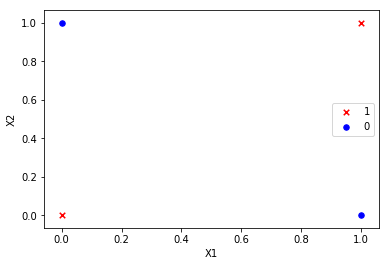

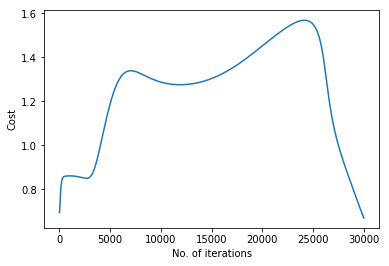

[array([ 0.86500221])] [array([ 0.66297446])] [array([ 0.82901178])] [array([ 0.07405947])]


In [27]:
X = []
Y = []
with open("XOR.csv","r") as csvfile:      #importing data from csv file
    lines = csv.reader(csvfile)
    dataset = list(lines)
    for i in range(len(dataset)):
        X.append([int(dataset[i][0]),int(dataset[i][1])])      #Feature matrix formation
        Y.append(int(dataset[i][2]))                           #Output matrix formation
displayData(X,Y)                                               #Displaying the data
Theta_1,Theta_2 = Randomise()                                  #Randomising Theta_1,Theta_2
Theta_1,Theta_2 = Train_NN(X,Y,Theta_1,Theta_2)                 #Training Neural Network
h1, z3, a2, a1 = ForwardProp(X[0], Theta_1, Theta_2)
h2, z3, a2, a1 = ForwardProp(X[1], Theta_1, Theta_2)
h3, z3, a2, a1 = ForwardProp(X[2], Theta_1, Theta_2)
h4, z3, a2, a1 = ForwardProp(X[3], Theta_1, Theta_2)
print(h1,h2,h3,h4)

In [22]:
print(X)

[[0, 0], [0, 1], [1, 0], [1, 1]]


In [23]:
Y

[0, 1, 1, 0]

In [29]:
print(Theta_1, Theta_2)

[[-4.56135382  1.40605704  2.49830415]
 [ 0.46609344 -0.49083954  1.03340563]
 [-5.45605762  1.88778399  3.09594159]] [[ 2.16282159 -5.52570692 -0.35819167 -6.61277976]]
